<style>
    .custom-header {
        background-color: #2c3e50;
        color: #ecf0f1;
        padding: 20px;
        text-align: center;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    }
    .custom-header h1 {
        margin: 0;
        font-size: 2.5em;
        font-weight: 300;
    }
</style>

<div class="custom-header">
    <h2>Import Libraries</h2>
</div>

In [1]:
#Data management
import pandas as pd
import numpy as np
np.random.seed(0)
#from pandas_profiling import ProfileReport

#TextBlob Features
from textblob import TextBlob

#Plotting
import matplotlib.pyplot as plt
import plotly.graph_objects as go


#SciKit-Learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#nltk
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

#Tensorflow / Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Test
from collections import Counter

<style>
    .custom-header {
        background-color: #2c3e50;
        color: #ecf0f1;
        padding: 20px;
        text-align: center;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    }
    .custom-header h1 {
        margin: 0;
        font-size: 2.5em;
        font-weight: 300;
    }
</style>

<div class="custom-header">
    <h2>Import Data</h2>
</div>

In [2]:
# Train Data
path = "twitter_training.csv"
train_df = pd.read_csv(path, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

# Test Data ( Not to be used until the full model has been trained)
test_path = "twitter_validation.csv"
test_df = pd.read_csv(test_path, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

In [3]:
train_df

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


<style>
    .custom-header {
        background-color: #2c3e50;
        color: #ecf0f1;
        padding: 20px;
        text-align: center;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    }
    .custom-header h1 {
        margin: 0;
        font-size: 2.5em;
        font-weight: 300;
    }
</style>

<div class="custom-header">
    <h2>Dropping NA Values</h2>
</div>

In [4]:
train_df = train_df.dropna()
test_df = test_df.dropna()

In [5]:
train_df.shape

(73996, 4)

<style>
    .custom-header {
        background-color: #2c3e50;
        color: #ecf0f1;
        padding: 20px;
        text-align: center;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    }
    .custom-header h1 {
        margin: 0;
        font-size: 2.5em;
        font-weight: 300;
    }
</style>

<div class="custom-header">
    <h2>Subsetting Data</h2>
</div>

In [6]:
df = train_df.sample(frac=0.1)
df.reset_index(drop=True, inplace=True)

<style>
    .custom-header {
        background-color: #2c3e50;
        color: #ecf0f1;
        padding: 20px;
        text-align: center;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    }
    .custom-header h1 {
        margin: 0;
        font-size: 2.5em;
        font-weight: 300;
    }
</style>

<div class="custom-header">
    <h2>Data Exploration</h2>
</div>

In [7]:
#See overall information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       7400 non-null   int64 
 1   Entity         7400 non-null   object
 2   Sentiment      7400 non-null   object
 3   Tweet_Content  7400 non-null   object
dtypes: int64(1), object(3)
memory usage: 231.4+ KB


In [8]:
#Display a few entries
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2535,Borderlands,Negative,@ Borderlands. Can we get a big fix please? I'...
1,11073,TomClancysGhostRecon,Negative,@GhostRecon You call 1.1.0 an update. You're h...
2,3024,Dota2,Neutral,I'm excited to watch the EU's closed qualifyin...
3,6719,Fortnite,Negative,"anyways but my fortnite here,, im annoyed."
4,1533,Battlefield,Negative,Collateral with the revolver is so satisfying....


<style>
    .custom-header {
        background-color: #2c3e50;
        color: #ecf0f1;
        padding: 20px;
        text-align: center;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    }
    .custom-header h1 {
        margin: 0;
        font-size: 2.5em;
        font-weight: 300;
    }
</style>

<div class="custom-header">
    <h2>Checking Balance of the in Output Categories</h2>
</div>

In [9]:

# Calculate the counts and proportions of each sentiment
sentiment_counts = df['Sentiment'].value_counts()
sentiments = sentiment_counts.index.tolist()
sentiment_nums = (sentiment_counts / sentiment_counts.sum()).tolist()

# Create the bar chart
fig = go.Figure(data=[go.Bar(
    x=sentiments, 
    y=sentiment_nums,
    text=[f"{num:.2%}" for num in sentiment_nums],  # Adding text labels
    textposition='auto',
    marker_color='indigo',  # Custom bar color
    opacity=0.7  # Bar opacity
)])

# Update layout for better visualization
fig.update_layout(
    title="Distribution of Sentiment Classes",
    xaxis_title="Sentiment",
    yaxis_title="Proportion",
    yaxis_tickformat=".2%",
    template="plotly_white",
    font=dict(
        size=14
    ),
    xaxis=dict(
        tickmode='array',
        tickvals=sentiments
    )
)

# Add annotations for better clarity
fig.add_annotation(
    text="Sentiment Analysis",
    xref="paper", yref="paper",
    x=0.5, y=1.1, showarrow=False,
    font=dict(size=16)
)

# Show the plot
fig.show(renderer='browser')

<style>
    .custom-header {
        background-color: #2c3e50;
        color: #ecf0f1;
        padding: 20px;
        text-align: center;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    }
    .custom-header h1 {
        margin: 0;
        font-size: 2.5em;
        font-weight: 300;
    }
</style>

<div class="custom-header">
    <h2>Label to Indexes (and Back Again)</h2>
</div>

In [21]:
# Define the indexing for each possible label in a dictionary
class_to_index = {"Neutral":0, "Irrelevant":1, "Negative":2, "Positive":3}

# Create a reverse dictionary
index_to_class = dict((v,k) for k,v in class_to_index.items())

# Create Lambda function, applying the appropriate dictionary
names_to_ids = lambda n: np.array([class_to_index.get(x) for x in n])
ids_to_names = lambda n: np.array([index_to_class.get(x) for x in n])

In [22]:
# Test each function 
print(names_to_ids(["Positive", "Negative", "Irrelevant", "Neutral"]))
print(ids_to_names([0,1,2,3]))

[3 2 1 0]
['Neutral' 'Irrelevant' 'Negative' 'Positive']


In [23]:

#Convert the "Sentiment" column into indexes
df["Sentiment"] = names_to_ids(df["Sentiment"])

In [24]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2535,Borderlands,2,@ Borderlands. Can we get a big fix please? I'...
1,11073,TomClancysGhostRecon,2,@GhostRecon You call 1.1.0 an update. You're h...
2,3024,Dota2,0,I'm excited to watch the EU's closed qualifyin...
3,6719,Fortnite,2,"anyways but my fortnite here,, im annoyed."
4,1533,Battlefield,2,Collateral with the revolver is so satisfying....


<style>
    .custom-header {
        background-color: #2c3e50;
        color: #ecf0f1;
        padding: 20px;
        text-align: center;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    }
    .custom-header h1 {
        margin: 0;
        font-size: 2.5em;
        font-weight: 300;
    }
</style>

<div class="custom-header">
    <h2>NPL Data Enrichment</h2>
</div>

In [35]:
def remove_stopwords(ls):
    #Lemmatises, then removes stop words
    ls = [lemmatiser.lemmatize(word) for word in ls if word not in (stop_english) and (word.isalpha())]
    
    #Joins the words back into a single string
    ls = " ".join(ls)
    return ls

#Splits each string into a list of words
df["Tweet_Content_Split"] = df["Tweet_Content"].apply(word_tokenize)

#Applies the above function to each entry in the DataFrame
lemmatiser = WordNetLemmatizer()
stop_english = Counter(stopwords.words()) #Here we use a Counter dictionary on the cached
                                          # list of stop words for a huge speed-up
df["Tweet_Content_Split"] = df["Tweet_Content_Split"].apply(remove_stopwords)

In [36]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Tweet_Content_Split
0,2535,Borderlands,2,@ Borderlands. Can we get a big fix please? I'...,Borderlands Can big fix I reset entire factory...
1,11073,TomClancysGhostRecon,2,@GhostRecon You call 1.1.0 an update. You're h...,GhostRecon You call update You laugh stay conn...
2,3024,Dota2,0,I'm excited to watch the EU's closed qualifyin...,I excited watch EU closed qualifying match EU ...
3,6719,Fortnite,2,"anyways but my fortnite here,, im annoyed.",fortnite annoyed
4,1533,Battlefield,2,Collateral with the revolver is so satisfying....,Collateral revolver unk


<style>
    .custom-header {
        background-color: #2c3e50;
        color: #ecf0f1;
        padding: 20px;
        text-align: center;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    }
    .custom-header h1 {
        margin: 0;
        font-size: 2.5em;
        font-weight: 300;
    }
</style>

<div class="custom-header">
    <h2>Tokenization</h2>
</div>

In [37]:
#Define the Tokeniser
tokeniser = Tokenizer(num_words=10000, lower=True)

#Create the corpus by finding the most common 
tokeniser.fit_on_texts(df["Tweet_Content_Split"])

In [38]:
#Tokenise our column of edited Tweet content
tweet_tokens = tokeniser.texts_to_sequences(list(df["Tweet_Content_Split"]))

In [39]:
#Pad these sequences to make them the same length
tweet_tokens = pad_sequences(tweet_tokens, truncating = 'post', padding='post', maxlen=50)

In [40]:
tweet_tokens.shape

(7400, 50)

<style>
    .custom-header {
        background-color: #2c3e50;
        color: #ecf0f1;
        padding: 20px;
        text-align: center;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    }
    .custom-header h1 {
        margin: 0;
        font-size: 2.5em;
        font-weight: 300;
    }
</style>

<div class="custom-header">
    <h2>Final Data Preparation</h2>
</div>

In [41]:
#Remove dependent variable
y = df["Sentiment"]

#Drop all non-useful columns
df = pd.DataFrame(tweet_tokens)

In [42]:
#Display final shape
df.shape

(7400, 50)

<style>
    .custom-header {
        background-color: #2c3e50;
        color: #ecf0f1;
        padding: 20px;
        text-align: center;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    }
    .custom-header h1 {
        margin: 0;
        font-size: 2.5em;
        font-weight: 300;
    }
</style>

<div class="custom-header">
    <h2>Test-Train Split</h2>
</div>

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1)
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(10000,16,input_length=50),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

c:\Users\murta\OneDrive\Desktop\ML&DE\second-semester\Introduction ML\Social-Media-Sentiment-Analysis\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



<style>
    .custom-header {
        background-color: #2c3e50;
        color: #ecf0f1;
        padding: 20px;
        text-align: center;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    }
    .custom-header h1 {
        margin: 0;
        font-size: 2.5em;
        font-weight: 300;
    }
</style>

<div class="custom-header">
    <h2>Training</h2>
</div>

In [45]:
h = model.fit(
     X_train, y_train,
     validation_data=(X_test, y_test),
     epochs=15,
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)]
)

Epoch 1/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.3123 - loss: 1.3628 - val_accuracy: 0.4257 - val_loss: 1.2631
Epoch 2/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5443 - loss: 1.0975 - val_accuracy: 0.5453 - val_loss: 1.1028
Epoch 3/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.7302 - loss: 0.7383 - val_accuracy: 0.5149 - val_loss: 1.1517
Epoch 4/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8255 - loss: 0.5098 - val_accuracy: 0.5520 - val_loss: 1.2102
Epoch 5/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8690 - loss: 0.3910 - val_accuracy: 0.5554 - val_loss: 1.2771
Epoch 6/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9043 - loss: 0.3035 - val_accuracy: 0.5608 - val_loss: 1.4720
Epoch 7/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9143 - loss: 0.2558 - val_accuracy: 0.5466 - val_loss: 1.4916
Epoch 8/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9257 - loss: 0.2252 - val_acc

<style>
    .custom-header {
        background-color: #2c3e50;
        color: #ecf0f1;
        padding: 20px;
        text-align: center;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    }
    .custom-header h1 {
        margin: 0;
        font-size: 2.5em;
        font-weight: 300;
    }
</style>

<div class="custom-header">
    <h2>Model Evaluation</h2>
</div>

In [46]:
#Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

#Assign labels to predictions and test data
y_pred_labels = ids_to_names(y_pred)
y_test_labels = ids_to_names(y_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


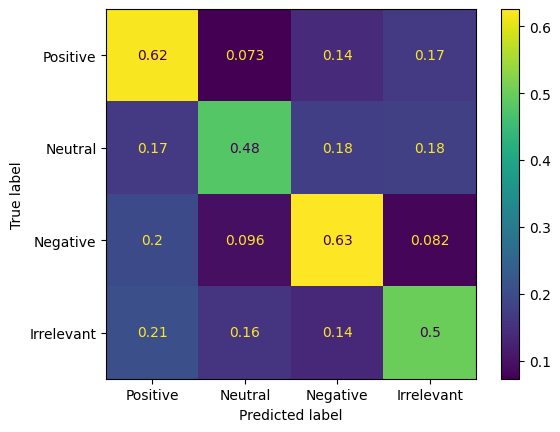

In [47]:
y_unique = list(set(y_test_labels))
cm = confusion_matrix(y_test_labels, y_pred_labels, labels = y_unique, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_unique)
disp.plot()